In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
df_train = pd.read_csv('../train.csv')
df_test = pd.read_csv('../test.csv')

In [75]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [76]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [77]:
df = pd.concat([df_train, df_test], axis=0)
df = df.set_index('id')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [78]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    27798
Automobile                5939
Walking                    747
Motorbike                   57
Bike                        57
Name: count, dtype: int64

In [79]:
df_ = df.copy()
df_['Gender'] = df_['Gender'].replace({'Male':0, 'Female':1})
df_['family_history_with_overweight'] = df_['family_history_with_overweight'].replace({'no':0, 'yes':1})
df_['FAVC'] = df_['FAVC'].replace({'no':0, 'yes':1})
df_['SCC'] = df_['SCC'].replace({'no':0, 'yes':1})
df_['SMOKE'] = df_['SMOKE'].replace({'no':0, 'yes':1})
# df_['BMI'] = df_['Weight'] / (df_['Height'] * df_['Height'])
caec = pd.get_dummies(df_['CAEC'], prefix='CAEC')
calc = pd.get_dummies(df_['CALC'], prefix='CALC')
mtrans = pd.get_dummies(df_['MTRANS'], prefix='MTRANS')
df_ = pd.concat([df_, caec, calc, mtrans], axis=1)
# df_['CAEC'] = df_['CAEC'].replace({
#     'no':0,
#     'Sometimes':1,
#     'Frequently':2,
#     'Always':3,
# })
# df_['MTRANS'] = df_['MTRANS'].replace({
#     'Public_Transportation':0,
#     'Automobile':1,
#     'Walking':2,
#     'Motorbike':3,
#     'Bike':4,
# })
# df_['CALC'] = df_['CALC'].replace({
#     'no':0,
#     'Sometimes':1,
#     'Frequently':2,
#     'Always':3,
# })
df_['NObeyesdad'] = df_['NObeyesdad'].replace({
    'Obesity_Type_III':0,
    'Obesity_Type_II':1,
    'Normal_Weight':2,
    'Obesity_Type_I':3,
    'Insufficient_Weight':4,
    'Overweight_Level_II':5,
    'Overweight_Level_I':6
    })
df_ = df_.drop({
    'CAEC',
    'CALC',
    'MTRANS',
    }, axis=1)
df_.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,...,False,False,False,True,False,False,False,False,True,False
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,2.000000,...,False,False,False,False,True,True,False,False,False,False
2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,...,False,False,False,False,True,False,False,False,True,False
3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,...,False,False,False,True,False,False,False,False,True,False
4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,...,False,False,False,True,False,False,False,False,True,False


In [80]:
df.isnull().sum()

Gender                                0
Age                                   0
Height                                0
Weight                                0
family_history_with_overweight        0
FAVC                                  0
FCVC                                  0
NCP                                   0
CAEC                                  0
SMOKE                                 0
CH2O                                  0
SCC                                   0
FAF                                   0
TUE                                   0
CALC                                  0
MTRANS                                0
NObeyesdad                        13840
dtype: int64

In [81]:
df_train_ = df_[df_['NObeyesdad'].isnull() == False]
df_test_ = df_[df_['NObeyesdad'].isnull() == True]
df_test_ = df_test_.drop('NObeyesdad', axis=1)

In [82]:
x = df_train_.drop('NObeyesdad', axis=1)
y = df_train_['NObeyesdad']

x_train, x_test, t_train, t_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

# lgb_train = lgb.Dataset(x_train, t_train, free_raw_data=False)
# lgb_test = lgb.Dataset(x_test, t_test)

In [83]:
df_train['NObeyesdad']

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

<Axes: xlabel='count', ylabel='NObeyesdad'>

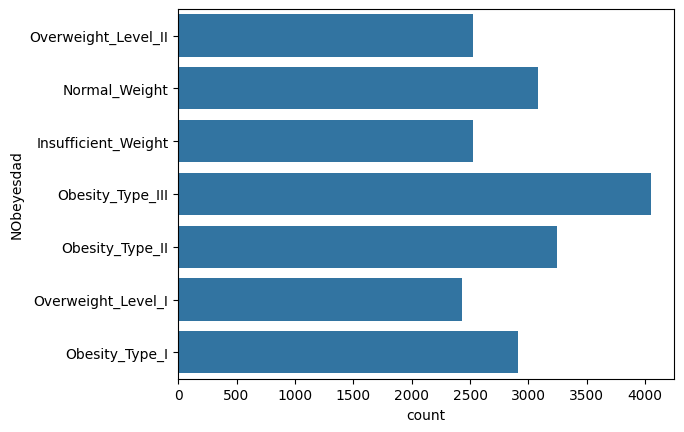

In [84]:
sns.countplot(df_train['NObeyesdad'])

In [85]:
# params = {
#     'objective':'multiclass',
#     'seed':0,
#     'num_iterations':2000,
#     'learning_rate':0.05,
#     'num_class':7,
#     # 'verbose':1,
#     # 'max_depth':13,
#     'metrics':'multi_logloss',
#     # 'num_leaves':25,
#     # 'early_stopping_round':0,
#     'lambda_l1':5,
#     # 'lambda_l2':1000,
#     # 'min_gain_to_split':0,
#     # 'bagging_freq':15,
#     # 'bagging_fraction':0.9,
#     # 'feature_fraction':0.8,
#     # 'min_data_in_leaf':20,
#     # 'colsample_bytree':1.0,
#     # 'max_bin':255,
#     # 'weight_column':,
#     }

# model = lgb.train(
#     params,
#     lgb_train,
#     valid_sets = lgb_test,
#     num_boost_round = 100,
# # categorical_feature = cat_list,
# )

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

# 個々のモデルの定義
base_models = [
    # ('rf', RandomForestClassifier(n_estimators=100, random_state=0)),
    # ('xgb', XGBClassifier(
    #     n_estimators=500,
    #     learning_rate=0.07,
    #     random_state=0,
    #     subsample=0.8,
    #     reg_alpha=5,
    #     max_depth=10,
    #     # gamma=5,
    #     # ccp_alpha=10,
    #     )),
    # ('gb', GradientBoostingClassifier(
    #     n_estimators=1700,
    #     learning_rate=0.03,
    #     random_state=0,
    #     )),
    # ('ada', AdaBoostClassifier(n_estimators=100, random_state=0)),
    ('lgb1', LGBMClassifier(
        objective='multiclass',
        seed=0,
        num_iterations=500,
        learning_rate=0.07,
        num_class=7,
        # 'verbose':1,
        max_depth=15,
        metrics='multi_logloss',
        num_leaves=25,
        # 'early_stopping_round':0,
        lambda_l1=5,
        # 'lambda_l2':1000,
        # 'min_gain_to_split':0,
        # 'bagging_freq':15,
        # 'bagging_fraction':0.9,
        feature_fraction=0.8,
        # 'min_data_in_leaf':20,
        # 'colsample_bytree':1.0,
        # 'max_bin':255,
        # 'weight_column':,
        )),
    # ('lgb2', LGBMClassifier(
    #     objective='multiclass',
    #     seed=0,
    #     num_iterations=1000,
    #     learning_rate=0.05,
    #     num_class=7,
    #     # 'verbose':1,
    #     max_depth=8,
    #     metrics='multi_logloss',
    #     num_leaves=25,
    #     # 'early_stopping_round':0,
    #     lambda_l1=5,
    #     # 'lambda_l2':1000,
    #     # 'min_gain_to_split':0,
    #     # 'bagging_freq':15,
    #     # 'bagging_fraction':0.9,
    #     feature_fraction=0.8,
    #     # 'min_data_in_leaf':20,
    #     # 'colsample_bytree':1.0,
    #     # 'max_bin':255,
    #     # 'weight_column':,
    #     )),
    ('lgb3', LGBMClassifier(
        objective='multiclass',
        seed=0,
        num_iterations=500,
        learning_rate=0.07,
        num_class=7,
        # 'verbose':1,
        max_depth=3,
        metrics='multi_logloss',
        num_leaves=25,
        # 'early_stopping_round':0,
        lambda_l1=2,
        # 'lambda_l2':1000,
        # 'min_gain_to_split':0,
        # 'bagging_freq':15,
        # 'bagging_fraction':0.9,
        feature_fraction=0.8,
        # 'min_data_in_leaf':20,
        # 'colsample_bytree':1.0,
        # 'max_bin':255,
        # 'weight_column':,
        )),
]

model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
model.fit(x_train, t_train)

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 14530, number of used features: 25
[LightGBM] [Info] Start training from score -1.635232
[LightGBM] [Info] Start training from score -1.854675
[LightGBM] [Info] Start training from score -1.907497
[LightGBM] [Info] Start training from s

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 14530, number of used features: 25
[LightGBM] [Info] Start training from score -1.635232
[LightGBM] [Info] Start training from score -1.854675
[LightGBM] [Info] Start training from score -1.907497
[LightGBM] [Info] Start training from s

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 11624, number of used features: 24
[LightGBM] [Info] Start training from score -1.635056
[LightGBM] [Info] Start training from score -1.854785
[LightGBM] [Info] Start training from score -1.907265
[LightGBM] [Info] Start training from s

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 11624, number of used features: 24
[LightGBM] [Info] Start training from score -1.635056
[LightGBM] [Info] Start training from score -1.854235
[LightGBM] [Info] Start training from score -1.907845
[LightGBM] [Info] Start training from s

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2053
[LightGBM] [Info] Number of data points in the train set: 11624, number of used features: 25
[LightGBM] [Info] Start training from score -1.635056
[LightGBM] [Info] Start training from score -1.854785
[LightGBM] [Info] Start training from score -1.907845
[LightGBM] [Info] Start training from s

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 11624, number of used features: 25
[LightGBM] [Info] Start training from score -1.635497
[LightGBM] [Info] Start training from score -1.854785
[LightGBM] [Info] Start training from score -1.907265
[LightGBM] [Info] Start training from score -1.964492
[LightGBM] [Info] Start training from score -2.10

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 11624, number of used features: 24
[LightGBM] [Info] Start training from score -1.635497
[LightGBM] [Info] Start training from score -1.854785
[LightGBM] [Info] Start training from score -1.907265
[LightGBM] [Info] Start training from s

c:\Users\81908\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('lgb1',
                                LGBMClassifier(feature_fraction=0.8,
                                               lambda_l1=5, learning_rate=0.07,
                                               max_depth=15,
                                               metrics='multi_logloss',
                                               num_class=7, num_iterations=500,
                                               num_leaves=25,
                                               objective='multiclass',
                                               seed=0)),
                               ('lgb3',
                                LGBMClassifier(feature_fraction=0.8,
                                               lambda_l1=2, learning_rate=0.07,
                                               max_depth=3,
                                               metrics='multi_logloss',
                                               num_class=7, num_iterations=500,
                                               num_leaves=25,
                                               objective='multiclass',
                                               seed=0))],
                   final_estimator=LogisticRegression())

In [87]:
prepre = model.predict_proba(x_train)
pre = model.predict_proba(x_test)

prepre = np.argmax(prepre, axis=1)
pre = np.argmax(pre, axis=1)

print(accuracy_score(t_train, prepre))
print(accuracy_score(t_test, pre))

print('trainデータ')
print(pd.crosstab(prepre, t_train))

print('\ntestデータ')
print(pd.crosstab(pre, t_test))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
0.9399174122505162
0.911849710982659
trainデータ
NObeyesdad   0.0   1.0   2.0   3.0   4.0   5.0   6.0
row_0    

In [88]:
# lgb.plot_importance(model)

In [89]:
submission = df_test_.copy()
prediction = model.predict_proba(df_test_)
prediction = np.argmax(prediction, axis=1)
submission['NObeyesdad'] = prediction
submission = submission[['NObeyesdad']]

submission['NObeyesdad'] = submission['NObeyesdad'].replace({
    0:'Obesity_Type_III',
    1:'Obesity_Type_II',
    2:'Normal_Weight',
    3:'Obesity_Type_I',
    4:'Insufficient_Weight',
    5:'Overweight_Level_II',
    6:'Overweight_Level_I'
    })

submission.head()

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2


,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III


In [91]:
# submission.to_csv('../提出ファイル/submission_stac_16.csv', index=True, header=True)